# Analyzing Movie review & Sentiment analysis - Application

In [70]:
import os
os.chdir('/Users/a589565/Desktop/Python_Code/data')

In [71]:
import spacy
# https://stackoverflow.com/questions/43459437/spacy-link-error

In [72]:
# !pip install contractions

In [73]:
# !pip install beautifulsoup

# Text Pre-processing and Normalisation

We are taking care of three elements
1. Cleaning Text
2. Removing Accented Character
3. Expanding Contraction
4. Removing Special Char
5. Stemming and Lemmatosation
6. Removing Stopwords

In [74]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

# Sample Text

In [76]:
document = """<p>Héllo! Héllo! can you hear me! I just heard about <b>Python</b>!<br/>\r\n 
              It's an amazing language which can be used for Scripting, Web development,\r\n\r\n
              Information Retrieval, Natural Language Processing, Machine Learning & Artificial Intelligence!\n
              What are you waiting for? Go and get started.<br/> He's learning, she's learning, they've already\n\n
              got a headstart!</p>
           """
document

"<p>Héllo! Héllo! can you hear me! I just heard about <b>Python</b>!<br/>\r\n \n              It's an amazing language which can be used for Scripting, Web development,\r\n\r\n\n              Information Retrieval, Natural Language Processing, Machine Learning & Artificial Intelligence!\n\n              What are you waiting for? Go and get started.<br/> He's learning, she's learning, they've already\n\n\n              got a headstart!</p>\n           "

In [77]:
normalize_corpus([document], text_lemmatization=True,stopword_removal=False,text_lower_case=False)

['hello hello can you hear me i just hear about python it be an amazing language which can be use for scripting web development information retrieval natural language processing machine learning artificial intelligence what be you wait for go and get start he be learn she be learn they have already get a headstart ']

In [78]:
normalize_corpus([document])

['hello hello hear hear python amazing language use scripting web development information retrieval natural language processing machine learning artificial intelligence wait go get start learn learn already get headstart']

# Unsupervised Lexicon Based Model

Create the module for model evaluation metrics

In [79]:
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.base import clone
from scipy import interp
from sklearn.metrics import roc_curve,auc

In [81]:
import pandas as pd
import numpy as np
# import text_normalizer as tn
np.set_printoptions(precision=2, linewidth=80)

# Load and Normalize data

In [82]:
datasets = pd.read_csv('movie_review_v1.csv', encoding='ISO-8859-1')
# reviews = np.array(datasets['review'])

In [83]:
datasets.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [84]:
review = np.array(datasets['review'])
sentiments = np.array(datasets['sentiment'])

In [85]:
review.shape

(50000,)

In [86]:
sentiments.shape

(50000,)

In [87]:
review

array([ "One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due t

In [88]:
# extract data for model evaluation
test_review = review[35000:]
test_sentiments = sentiments[35000:]
sample_review_ids = [7654,3533,13010]

In [89]:
# normalize dataset
norm_test_review = normalize_corpus(test_review)

In [90]:
# Sentiment Analysis using AFINN
from afinn import Afinn

In [91]:
afn = Afinn(emoticons=True) 

In [92]:
## Predict sentiment for sample reviews
for review, sentiment in zip(test_review[sample_review_ids],test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    print('Predicted Sentiment polarity:', afn.score(review))
    print('-'*60)

REVIEW: Considering the risk of showing same-sex relationships before the late 1980's, Personal Best could have done better to play the same-sex relationship between Hemingway (Chris Cahill) and Donnelly (Tory Skinner) as a more than experimental phase of Cahill's life.<br /><br />It seems to me that the creators of this movie threw in the same-sex relationship between two fairly attractive women in order to attract viewers. Also consider the 90 seconds of exposing the crotches of several women jumping backwards over a high jump pole. This random scene had VERY LITTLE relevance to the movie and it appeared as though this was done merely to keep the audience interested in this bland movie. I suppose the producers were trying to counteract the boring plot and the even more boring setting of the movie (the 1980 Oregon Track and Field Competition).<br /><br />This review may seem harsh, but it is the truth. The exploitation of young Muriel Hemingway's body and the same-sex relationship rui

In [93]:
# ## Predict sentiment for test dataset
sentiment_polarity = [afn.score(review) for review in test_review]
predicted_sentiments = ['positive' if score>=1.0 else 'negative' for score in sentiment_polarity]

In [94]:
predicted_sentiments

['positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'negative',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'negative',
 'positive',
 'negative',
 'negative',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',

In [95]:
# Evaluate Model Performance
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predicted_sentiments, 
                                  classes =['positive','negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.7118
Precision: 0.7289
Recall: 0.7118
F1 Score: 0.7062

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.67      0.85      0.75      7510
   negative       0.79      0.57      0.67      7490

avg / total       0.73      0.71      0.71     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6376     1134
        negative       3189     4301


In [96]:
# # Sentiment Analysis with SentiWordNet
from nltk.corpus import sentiwordnet as swn

In [97]:
awesome = list(swn.senti_synsets('awesome', 'a'))[0]
print('Positive Polarity Score:', awesome.pos_score())
print('Negative Polarity Score:', awesome.neg_score())
print('Objective Score:', awesome.obj_score())

Positive Polarity Score: 0.875
Negative Polarity Score: 0.125
Objective Score: 0.0


In [98]:
# Build The Models
def analyze_sentiment_sentiwordnet_lexicon(review,verbose=False):
    # tokenize and POS tag text tokens
    tagged_text = [(token.text, token.tag_) for token in nlp(review)]
    pos_score = neg_score = token_count = obj_score = 0
    # get wordnet synsets based on POS tags
    # get sentiment scores if synsets are found
    for word,tag in tagged_text:
        ss_set = None
        if 'NN' in tag and list(swn.senti_synsets(word, 'n')):
            ss_set = list(swn.senti_synsets(word, 'n'))[0]
        elif 'VB' in tag and list(swn.senti_synsets(word, 'v')):
            ss_set = list(swn.senti_synsets(word, 'v'))[0]
        elif 'JJ' in tag and list(swn.senti_synsets(word, 'a')):
            ss_set = list(swn.senti_synsets(word, 'a'))[0]
        elif 'RB' in tag and list(swn.senti_synsets(word, 'r')):
            ss_set = list(swn.senti_synsets(word, 'r'))[0]
        # if senti-synset is found 
        if ss_set:
            # add scores for all found synsets
            pos_score += ss_set.pos_score()
            neg_score += ss_set.neg_score()
            obj_score += ss_set.obj_score()
            token_count += 1
        # aggregate final scores
    final_score = pos_score - neg_score
    norm_final_score = round(float(final_score) / token_count, 2)
    final_sentiment = 'positive' if norm_final_score >= 0 else 'negative'
        
    if verbose:
        norm_obj_score = round(float(obj_score) / token_count, 2)
        norm_pos_score = round(float(pos_score) / token_count, 2)
        norm_neg_score = round(float(neg_score) / token_count, 2)
        # to display results in a nice table
        sentiment_frame = pd.DataFrame([[final_sentiment, norm_obj_score, norm_pos_score, 
                                         norm_neg_score, norm_final_score]],
                                       columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'], 
                                                             ['Predicted Sentiment', 'Objectivity',
                                                              'Positive', 'Negative', 'Overall']], 
                                                             labels=[[0,0,0,0,0],[0,1,2,3,4]]))
        print(sentiment_frame)
    return final_sentiment

In [99]:
# ## Predict sentiment for sample reviews
for review, sentiment in zip(test_review[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    pred = analyze_sentiment_sentiwordnet_lexicon(review, verbose=True)    
    print('-'*60)

REVIEW: Considering the risk of showing same-sex relationships before the late 1980's, Personal Best could have done better to play the same-sex relationship between Hemingway (Chris Cahill) and Donnelly (Tory Skinner) as a more than experimental phase of Cahill's life.<br /><br />It seems to me that the creators of this movie threw in the same-sex relationship between two fairly attractive women in order to attract viewers. Also consider the 90 seconds of exposing the crotches of several women jumping backwards over a high jump pole. This random scene had VERY LITTLE relevance to the movie and it appeared as though this was done merely to keep the audience interested in this bland movie. I suppose the producers were trying to counteract the boring plot and the even more boring setting of the movie (the 1980 Oregon Track and Field Competition).<br /><br />This review may seem harsh, but it is the truth. The exploitation of young Muriel Hemingway's body and the same-sex relationship rui

In [100]:
# ## Predict sentiment for test dataset
predicted_sentiments = [analyze_sentiment_sentiwordnet_lexicon(review, verbose=False) for review in norm_test_review]

In [101]:
# ## Evaluate model performance
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predicted_sentiments, 
                                  classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.686
Precision: 0.6909
Recall: 0.686
F1 Score: 0.6839

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.66      0.77      0.71      7510
   negative       0.72      0.61      0.66      7490

avg / total       0.69      0.69      0.68     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       5758     1752
        negative       2958     4532


In [102]:
# # Sentiment Analysis with VADER
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [103]:
# ## Build model
def analyze_sentiment_vader_lexicon(review,threshold=0.1,verbose = False):
    # pre-process text
    review = strip_html_tags(review)
    review = remove_accented_chars(review)
    review = expand_contractions(review)
    
    # analyze the sentiment for review
    analyzer = SentimentIntensityAnalyzer()
    scores = analyzer.polarity_scores(review)
    # get aggregate scores and final sentiment
    agg_score = scores['compound']
    
    final_sentiment = 'positive' if agg_score>threshold else 'negative'
    
    if verbose:
        # display detailed sentiment statistics
        positive = str(round(scores['pos'], 2)*100)+'%'
        final = round(agg_score, 2)
        negative = str(round(scores['neg'], 2)*100)+'%'
        neutral = str(round(scores['neu'], 2)*100)+'%'
        
        sentiment_frame = pd.DataFrame([[final_sentiment, final, positive,
                                        negative, neutral]],
                                        columns=pd.MultiIndex(levels=[['SENTIMENT STATS:'], 
                                                                      ['Predicted Sentiment', 'Polarity Score',
                                                                       'Positive', 'Negative', 'Neutral']], 
                                                              labels=[[0,0,0,0,0],[0,1,2,3,4]]))
        print(sentiment_frame)
        
    return(final_sentiment)

In [104]:
# ## Predict sentiment for sample reviews
for review, sentiment in zip(test_review[sample_review_ids], test_sentiments[sample_review_ids]):
    print('REVIEW:', review)
    print('Actual Sentiment:', sentiment)
    pred = analyze_sentiment_vader_lexicon(review, threshold=0.4, verbose=True)    
    print('-'*60)

REVIEW: Considering the risk of showing same-sex relationships before the late 1980's, Personal Best could have done better to play the same-sex relationship between Hemingway (Chris Cahill) and Donnelly (Tory Skinner) as a more than experimental phase of Cahill's life.<br /><br />It seems to me that the creators of this movie threw in the same-sex relationship between two fairly attractive women in order to attract viewers. Also consider the 90 seconds of exposing the crotches of several women jumping backwards over a high jump pole. This random scene had VERY LITTLE relevance to the movie and it appeared as though this was done merely to keep the audience interested in this bland movie. I suppose the producers were trying to counteract the boring plot and the even more boring setting of the movie (the 1980 Oregon Track and Field Competition).<br /><br />This review may seem harsh, but it is the truth. The exploitation of young Muriel Hemingway's body and the same-sex relationship rui

In [105]:
# ## Predict sentiment for test dataset
predicted_sentiments = [analyze_sentiment_vader_lexicon(review, threshold=0.4, verbose=False) for review in test_review]

In [106]:
# ## Evaluate model performance
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predicted_sentiments, 
                                  classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.7109
Precision: 0.7235
Recall: 0.7109
F1 Score: 0.7067

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.67      0.83      0.74      7510
   negative       0.78      0.59      0.67      7490

avg / total       0.72      0.71      0.71     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6234     1276
        negative       3060     4430


# Classifying Sentiments using Supervised Model

In [107]:
# Import necessary depencencies
import pandas as pd
import numpy as np

In [108]:
# # Load and normalize data
# take a peek at the data
dataset = pd.read_csv('movie_review_v1.csv', encoding='ISO-8859-1')
print(dataset.head())
reviews = np.array(dataset['review'])
sentiments = np.array(dataset['sentiment'])

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [109]:
# Build - Train and Test Datasets
train_reviews = reviews[:35000]
test_reviews = reviews[35000:]
train_sentiments = sentiments[:35000]
test_sentiments = sentiments[35000:]

In [110]:
# Normalize the Dataset
norm_train_reviews = normalize_corpus(train_reviews)
norm_test_reviews = normalize_corpus(test_reviews)

# Applying the Traditional Supervised Machine Learning Model

In [111]:
# Feature Engineering
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [112]:
# Build BOW features on train reviews
cv = CountVectorizer(binary=False,min_df=0.0, max_df=1.0,ngram_range=(1,2))
cv_train_features = cv.fit_transform(norm_train_reviews)

In [113]:
# build TFIDF features on train reviews
tv = TfidfVectorizer(use_idf=True, min_df=0.0, max_df=1.0, ngram_range=(1,2),
                     sublinear_tf=True)
tv_train_features = tv.fit_transform(norm_train_reviews)

In [114]:
# transform test reviews into features
cv_test_features = cv.transform(norm_test_reviews)
tv_test_features = tv.transform(norm_test_reviews)

In [115]:
print('BOW model:> Train features shape:', cv_train_features.shape, ' Test features shape:', cv_test_features.shape)
print('TFIDF model:> Train features shape:', tv_train_features.shape, ' Test features shape:', tv_test_features.shape)

BOW model:> Train features shape: (35000, 2131148)  Test features shape: (15000, 2131148)
TFIDF model:> Train features shape: (35000, 2131148)  Test features shape: (15000, 2131148)


# Model Training, Prediction and Performance Evaluation

In [116]:
from sklearn.linear_model import SGDClassifier, LogisticRegression
lr = LogisticRegression(penalty='l2', max_iter=100, C=1)
svm = SGDClassifier(loss='hinge', n_iter=100)

In [117]:
# Logistic Regression model on BOW features
lr_bow_predictions = train_predict_model(classifier=lr, 
                                             train_features=cv_train_features, train_labels=train_sentiments,
                                             test_features=cv_test_features, test_labels=test_sentiments)
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_bow_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.9065
Precision: 0.9065
Recall: 0.9065
F1 Score: 0.9065

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.90      0.91      0.91      7510
   negative       0.91      0.90      0.91      7490

avg / total       0.91      0.91      0.91     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6826      684
        negative        719     6771


In [118]:
svm_bow_predictions = train_predict_model(classifier=svm, 
                                             train_features=cv_train_features, train_labels=train_sentiments,
                                             test_features=cv_test_features, test_labels=test_sentiments)
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=svm_bow_predictions,
                                      classes=['positive', 'negative'])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Model Performance metrics:
------------------------------
Accuracy: 0.9063
Precision: 0.9065
Recall: 0.9063
F1 Score: 0.9063

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.90      0.92      0.91      7510
   negative       0.91      0.90      0.91      7490

avg / total       0.91      0.91      0.91     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6878      632
        negative        773     6717


In [119]:
# Logistic Regression Model on Tf-Idf features
lr_tfidf_predictions = train_predict_model(classifier=lr, 
                                               train_features=tv_train_features, train_labels=train_sentiments,
                                               test_features=tv_test_features, test_labels=test_sentiments)
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_tfidf_predictions,
                                      classes=['positive', 'negative'])

Model Performance metrics:
------------------------------
Accuracy: 0.8957
Precision: 0.8957
Recall: 0.8957
F1 Score: 0.8957

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.89      0.90      0.90      7510
   negative       0.90      0.89      0.89      7490

avg / total       0.90      0.90      0.90     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6777      733
        negative        832     6658


In [120]:
# Logistic Regression Model on Tf-Idf features
svm_tfidf_predictions = train_predict_model(classifier=svm, 
                                               train_features=tv_train_features, train_labels=train_sentiments,
                                               test_features=tv_test_features, test_labels=test_sentiments)
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=lr_tfidf_predictions,
                                      classes=['positive', 'negative'])

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


Model Performance metrics:
------------------------------
Accuracy: 0.8957
Precision: 0.8957
Recall: 0.8957
F1 Score: 0.8957

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.89      0.90      0.90      7510
   negative       0.90      0.89      0.89      7490

avg / total       0.90      0.90      0.90     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6777      733
        negative        832     6658


# New Supervised Deep Learning Model

In [121]:
import gensim
import keras
from keras.models import Sequential
from keras.layers import Dropout, Activation, Dense
from sklearn.preprocessing import LabelEncoder

# Prediction class label encoding

In [122]:
le = LabelEncoder()
num_classes = 2
# tokenize train reviews & encode train labels
tokenized_train = [tokenizer.tokenize(text) for text in norm_train_reviews]
y_tr = le.fit_transform(train_sentiments)
y_train = keras.utils.to_categorical(y_tr, num_classes)
# tokenize test reviews & encode test labels
tokenized_test = [tokenizer.tokenize(text)
                   for text in norm_test_reviews]
y_ts = le.fit_transform(test_sentiments)
y_test = keras.utils.to_categorical(y_ts, num_classes)

In [123]:
# print class label encoding map and encoded labels
print('Sentiment class label map:', dict(zip(le.classes_, le.transform(le.classes_))))
print('Sample test label transformation:\n'+'-'*35,
      '\nActual Labels:', test_sentiments[:3], '\nEncoded Labels:', y_ts[:3], 
      '\nOne hot encoded Labels:\n', y_test[:3])

Sentiment class label map: {'negative': 0, 'positive': 1}
Sample test label transformation:
----------------------------------- 
Actual Labels: ['negative' 'positive' 'negative'] 
Encoded Labels: [0 1 0] 
One hot encoded Labels:
 [[ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]]


# Feature Engineering with word embeddings

In [124]:
w2v_num_features = 500
w2v_model = gensim.models.Word2Vec(tokenized_train, size=w2v_num_features, window=150,min_count=10, sample=1e-3)

In [126]:
# generate averaged word vector features from word2vec model
avg_wv_train_features = averaged_word2vec_vectorizer(corpus=tokenized_train, model=w2v_model,
                                                     num_features=500)
avg_wv_test_features = averaged_word2vec_vectorizer(corpus=tokenized_test, model=w2v_model,
                                                    num_features=500)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [127]:
print(avg_wv_train_features.shape)
avg_wv_train_features

(35000, 500)


array([[ 0.09,  0.05, -0.02, ..., -0.26, -0.12, -0.06],
       [ 0.04,  0.18, -0.05, ..., -0.01,  0.21, -0.25],
       [ 0.08,  0.14,  0.49, ..., -0.03, -0.17,  0.13],
       ..., 
       [-0.17,  0.02,  0.33, ...,  0.35, -0.14, -0.02],
       [ 0.27,  0.27,  0.21, ...,  0.1 , -0.53,  0.38],
       [ 0.02,  0.43,  0.43, ...,  0.31, -0.02, -0.19]])

# feature engineering with GloVe model

In [128]:
train_nlp = [nlp(item) for item in norm_train_reviews]
train_glove_features = np.array([item.vector for item in train_nlp])

In [129]:
test_nlp = [nlp(item) for item in norm_test_reviews]
test_glove_features = np.array([item.vector for item in test_nlp])

In [130]:
print('Word2Vec model:> Train features shape:', avg_wv_train_features.shape, ' Test features shape:', avg_wv_test_features.shape)
print('GloVe model:> Train features shape:', train_glove_features.shape, ' Test features shape:', test_glove_features.shape)

Word2Vec model:> Train features shape: (35000, 500)  Test features shape: (15000, 500)
GloVe model:> Train features shape: (35000, 300)  Test features shape: (15000, 300)


In [131]:
test_glove_features

array([[ 0.06, -0.02,  0.04, ...,  0.02,  0.02, -0.  ],
       [ 0.05, -0.  ,  0.04, ...,  0.01,  0.03, -0.  ],
       [ 0.05, -0.  ,  0.04, ...,  0.02,  0.01, -0.01],
       ..., 
       [ 0.05,  0.  ,  0.02, ...,  0.  ,  0.01, -0.01],
       [ 0.05,  0.01,  0.04, ...,  0.02,  0.03, -0.  ],
       [ 0.05, -0.01,  0.03, ...,  0.02,  0.03, -0.01]], dtype=float32)

# Modeling with deep neural networks

# Building Deep neural network architecture

In [132]:
def construct_deepnn_architecture(num_input_features):
    dnn_model = Sequential()
    dnn_model.add(Dense(512, activation='relu', input_shape=(num_input_features,)))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(512, activation='relu'))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(512, activation='relu'))
    dnn_model.add(Dropout(0.2))
    dnn_model.add(Dense(2))
    dnn_model.add(Activation('softmax'))

    dnn_model.compile(loss='categorical_crossentropy', optimizer='adam',                 
                      metrics=['accuracy'])
    return dnn_model

In [133]:
w2v_dnn = construct_deepnn_architecture(num_input_features=500)

# Visualize sample deep architecture

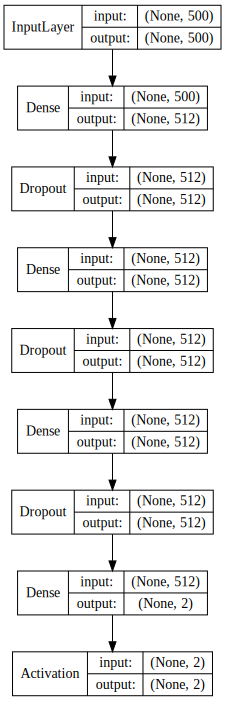

In [134]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(w2v_dnn, show_shapes=True, show_layer_names=False, 
                 rankdir='TB').create(prog='dot', format='svg'))

In [135]:
batch_size = 100
w2v_dnn.fit(avg_wv_train_features, y_train, epochs=5, batch_size=batch_size, 
            shuffle=True, validation_split=0.1, verbose=1)

Train on 31500 samples, validate on 3500 samples
Epoch 1/5
31500/31500 [==============================] - 4s 142us/step - loss: 0.3091 - acc: 0.8736 - val_loss: 0.3050 - val_acc: 0.8717
Epoch 2/5
31500/31500 [==============================] - 4s 112us/step - loss: 0.2837 - acc: 0.8841 - val_loss: 0.2938 - val_acc: 0.8723
Epoch 3/5
31500/31500 [==============================] - 3s 111us/step - loss: 0.2747 - acc: 0.8881 - val_loss: 0.2995 - val_acc: 0.8660
Epoch 4/5
31500/31500 [==============================] - 3s 111us/step - loss: 0.2690 - acc: 0.8909 - val_loss: 0.2908 - val_acc: 0.8774
Epoch 5/5
31500/31500 [==============================] - 4s 111us/step - loss: 0.2601 - acc: 0.8922 - val_loss: 0.3130 - val_acc: 0.8726


In [136]:
y_pred = w2v_dnn.predict_classes(avg_wv_test_features)
predictions = le.inverse_transform(y_pred) 

In [137]:
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predictions, 
                                      classes=['positive', 'negative']) 

Model Performance metrics:
------------------------------
Accuracy: 0.8817
Precision: 0.8843
Recall: 0.8817
F1 Score: 0.8815

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.85      0.92      0.89      7510
   negative       0.92      0.84      0.88      7490

avg / total       0.88      0.88      0.88     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6934      576
        negative       1199     6291


In [138]:
glove_dnn = construct_deepnn_architecture(num_input_features=300)

In [139]:
batch_size = 100
glove_dnn.fit(train_glove_features, y_train, epochs=5, batch_size=batch_size, 
              shuffle=True, validation_split=0.1, verbose=1)

Train on 31500 samples, validate on 3500 samples
Epoch 1/5
31500/31500 [==============================] - 4s 125us/step - loss: 0.5010 - acc: 0.7527 - val_loss: 0.4306 - val_acc: 0.7960
Epoch 2/5
31500/31500 [==============================] - 3s 103us/step - loss: 0.4398 - acc: 0.7950 - val_loss: 0.4101 - val_acc: 0.8174
Epoch 3/5
31500/31500 [==============================] - 3s 107us/step - loss: 0.4158 - acc: 0.8149 - val_loss: 0.4232 - val_acc: 0.8129
Epoch 4/5
31500/31500 [==============================] - 3s 104us/step - loss: 0.4148 - acc: 0.8112 - val_loss: 0.4010 - val_acc: 0.8194
Epoch 5/5
31500/31500 [==============================] - 3s 101us/step - loss: 0.4064 - acc: 0.8183 - val_loss: 0.4283 - val_acc: 0.8080


In [140]:
y_pred = glove_dnn.predict_classes(test_glove_features)
predictions = le.inverse_transform(y_pred) 

In [141]:
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predictions, 
                                      classes=['positive', 'negative']) 

Model Performance metrics:
------------------------------
Accuracy: 0.8051
Precision: 0.8186
Recall: 0.8051
F1 Score: 0.803

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.75      0.91      0.82      7510
   negative       0.88      0.70      0.78      7490

avg / total       0.82      0.81      0.80     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6821      689
        negative       2234     5256


# Advanced Deep Learning Model

In [142]:
import pandas as pd
import numpy as np
# import text_normalizer as tn
# import model_evaluation_utils as meu

np.set_printoptions(precision=2, linewidth=80)

In [143]:
dataset = pd.read_csv('movie_review_v1.csv', encoding='ISO-8859-1')
print(dataset.head())
reviews = np.array(dataset['review'])
sentiments = np.array(dataset['sentiment'])

                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [144]:
# build train and test datasets
train_reviews = reviews[:35000]
train_sentiments = sentiments[:35000]
test_reviews = reviews[35000:]
test_sentiments = sentiments[35000:]

# normalize datasets
norm_train_reviews = normalize_corpus(train_reviews)
norm_test_reviews = normalize_corpus(test_reviews)

# Tokenize Train and Test datasets

In [145]:
tokenized_train = [tokenizer.tokenize(text) for text in norm_train_reviews]
tokenized_test = [tokenizer.tokenize(text) for text in norm_test_reviews]

# Build Vocabulary Mapping (word to index)

In [146]:
from collections import Counter

# build word to index vocabulary
token_counter = Counter([token for review in tokenized_train for token in review])
vocab_map = {item[0]: index+1 for index, item in enumerate(dict(token_counter).items())}
max_index = np.max(list(vocab_map.values()))
vocab_map['PAD_INDEX'] = 0
vocab_map['NOT_FOUND_INDEX'] = max_index+1
vocab_size = len(vocab_map)
# view vocabulary size and part of the vocabulary map
print('Vocabulary Size:', vocab_size)
print('Sample slice of vocabulary map:', dict(list(vocab_map.items())[10:20]))

Vocabulary Size: 89047
Sample slice of vocabulary map: {'happen': 11, 'first': 12, 'thing': 13, 'strike': 14, 'brutality': 15, 'unflinching': 16, 'scene': 17, 'violence': 18, 'set': 19, 'word': 20}


# Encode and Pad datasets & Encode prediction class labels

In [147]:
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelEncoder

# get max length of train corpus and initialize label encoder
le = LabelEncoder()
num_classes=2 # positive -> 1, negative -> 0
max_len = np.max([len(review) for review in tokenized_train])

## Train reviews data corpus
# Convert tokenized text reviews to numeric vectors
train_X = [[vocab_map[token] for token in tokenized_review] for tokenized_review in tokenized_train]
train_X = sequence.pad_sequences(train_X, maxlen=max_len) # pad 
## Train prediction class labels
# Convert text sentiment labels (negative\positive) to binary encodings (0/1)
train_y = le.fit_transform(train_sentiments)

## Test reviews data corpus
# Convert tokenized text reviews to numeric vectors
test_X = [[vocab_map[token] if vocab_map.get(token) else vocab_map['NOT_FOUND_INDEX'] 
           for token in tokenized_review] 
              for tokenized_review in tokenized_test]
test_X = sequence.pad_sequences(test_X, maxlen=max_len)
## Test prediction class labels
# Convert text sentiment labels (negative\positive) to binary encodings (0/1)
test_y = le.transform(test_sentiments)

# view vector shapes
print('Max length of train review vectors:', max_len)
print('Train review vectors shape:', train_X.shape, ' Test review vectors shape:', test_X.shape)

Max length of train review vectors: 1442
Train review vectors shape: (35000, 1442)  Test review vectors shape: (15000, 1442)


# Build the LSTM Model Architecture

In [149]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, SpatialDropout1D
from keras.layers import LSTM

EMBEDDING_DIM = 128 # dimension for dense embeddings for each token
LSTM_DIM = 64 # total LSTM units

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=EMBEDDING_DIM, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(LSTM_DIM, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer="adam",
              metrics=["accuracy"])

In [150]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1442, 128)         11398016  
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 1442, 128)         0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 65        
Total params: 11,447,489
Trainable params: 11,447,489
Non-trainable params: 0
_________________________________________________________________
None


# Visualize model architecture

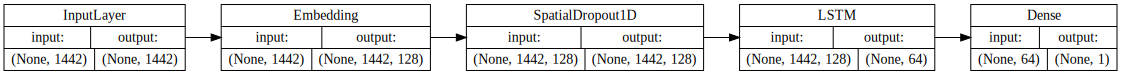

In [151]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True, show_layer_names=False, 
                 rankdir='LR').create(prog='dot', format='svg'))

# Train the model

In [152]:
batch_size = 100
model.fit(train_X, train_y, epochs=5, batch_size=batch_size, 
          shuffle=True, validation_split=0.1, verbose=1)

Train on 31500 samples, validate on 3500 samples
Epoch 1/5
31500/31500 [==============================] - 675s 21ms/step - loss: 0.4063 - acc: 0.8170 - val_loss: 0.3071 - val_acc: 0.8694
Epoch 2/5
31500/31500 [==============================] - 649s 21ms/step - loss: 0.2216 - acc: 0.9173 - val_loss: 0.3290 - val_acc: 0.8809
Epoch 3/5
31500/31500 [==============================] - 645s 20ms/step - loss: 0.1465 - acc: 0.9488 - val_loss: 0.4155 - val_acc: 0.8760
Epoch 4/5
31500/31500 [==============================] - 671s 21ms/step - loss: 0.0977 - acc: 0.9670 - val_loss: 0.4182 - val_acc: 0.8726
Epoch 5/5
31500/31500 [==============================] - 659s 21ms/step - loss: 0.0784 - acc: 0.9737 - val_loss: 0.4227 - val_acc: 0.8723


# Predict and Evaluate Model Performance

In [153]:
pred_test = model.predict_classes(test_X)
predictions = le.inverse_transform(pred_test.flatten())

In [154]:
display_model_performance_metrics(true_labels=test_sentiments, predicted_labels=predictions, 
                                      classes=['positive', 'negative']) 

Model Performance metrics:
------------------------------
Accuracy: 0.8754
Precision: 0.8754
Recall: 0.8754
F1 Score: 0.8754

Model Classification report:
------------------------------
             precision    recall  f1-score   support

   positive       0.88      0.87      0.88      7510
   negative       0.87      0.88      0.88      7490

avg / total       0.88      0.88      0.88     15000


Prediction Confusion Matrix:
------------------------------
                 Predicted:         
                   positive negative
Actual: positive       6556      954
        negative        915     6575
